In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

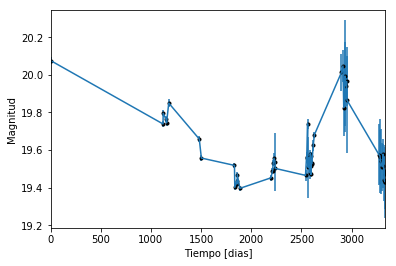

In [2]:
data = np.genfromtxt('LC_19608_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

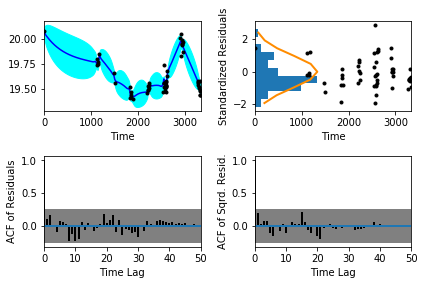

In [5]:
sample.assess_fit()

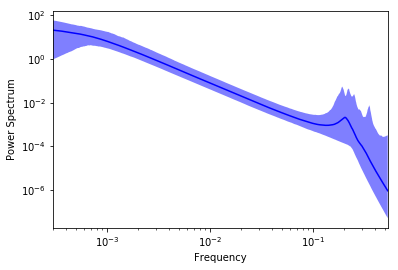

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.770652,'Medida del nivel de ruido')

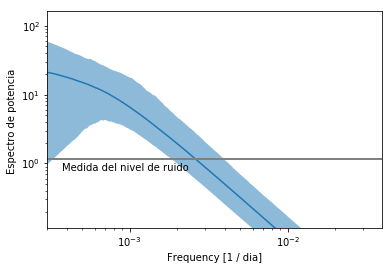

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

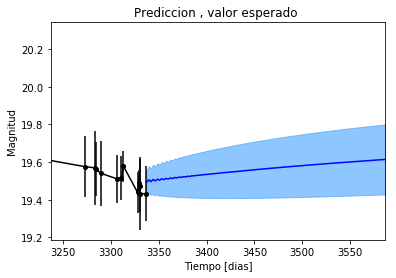

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

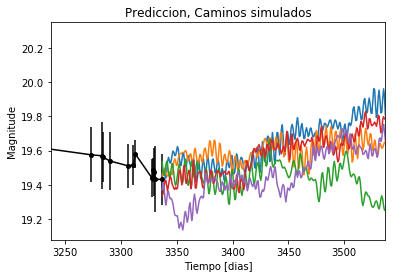

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


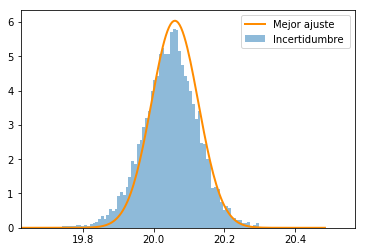

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

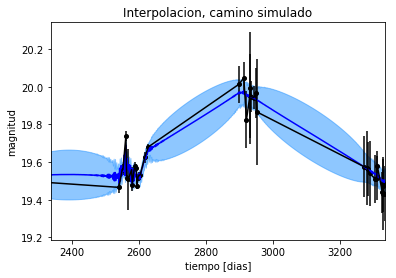

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

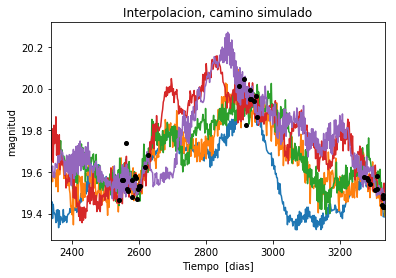

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 475.919869308
Median: 0.00849127798651
Standard deviation: 0.0783398417644
68% credibility interval: [ 0.00424506  0.01691227]
95% credibility interval: [ 0.00185553  0.08548866]
99% credibility interval: [ 0.0009308   0.73383274]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 453.282583955
Median: 0.00848811671495
Standard deviation: 0.0680372851695
68% credibility interval: [ 0.00424475  0.01691227]
95% credibility interval: [ 0.00184911  0.08548866]
99% credibility interval: [ 0.00090361  0.63291881]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 119.843278204
Median: 0.310549627746
Standard deviation: 0.325193036939
68%

In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 95.5885797998
Median: 0.229214849632
Standard deviation: 0.221927884181
68% credibility interval: [ 0.19297608  0.72349236]
95% credibility interval: [ 0.1698741   0.81378479]
99% credibility interval: [ 0.13023226  0.85461174]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 95.5885797998
Median: 0.229214849632
Standard deviation: 0.221927884181
68% credibility interval: [ 0.19297608  0.72349236]
95% credibility interval: [ 0.1698741   0.81378479]
99% credibility interval: [ 0.13023226  0.85461174]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 166.945932732
Median: 0.0
Standard deviation: 0.000331702624662
68% cred

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 688.114757661
Median: 82.9058825266
Standard deviation: 2.03199107647
68% credibility interval: [ 80.66028489  84.53698707]
95% credibility interval: [ 77.77711862  85.55240383]
99% credibility interval: [ 75.43272607  86.06958996]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 115.846519008
Median: 2.11483719437
Standard deviation: 2.29513843254
68% credibility interval: [ 0.16313063  5.03471396]
95% credibility interval: [ 0.06719518  6.68912967]
99% credibility interval: [  0.04061224  12.19239708]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 139.373019649
Median: 2.45259212918
Standard deviation: 10.9201955583
68% credibility interval: [  1.64448228  22.3468841 ]
95% credibility interval: [  1.3189823  

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 583.885168747
Median: 1.29007756657e-14
Standard deviation: 5.03215696565e+102
68% credibility interval: [  6.99081420e-38   3.03550813e+15]
95% credibility interval: [  6.12130388e-51   2.46838415e+37]
99% credibility interval: [  1.12029875e-51   2.85736499e+99]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 980.185209218
Median: 19.679968786
Standard deviation: 0.106713789901
68% credibility interval: [ 19.597357    19.79357678]
95% credibility interval: [ 19.49958636  19.9341028 ]
99% credibility interval: [ 19.41868697  20.02126213]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 95.5885797998
Median: 0.229214849632
Standard deviation: 0.221927884181
68% credibility interval: [ 0.19297608  0.72349236]
95% credibility interval: [ 0.1698741   0.81378479]
99% credibility interval: [ 0.13023226  0.85461174]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 95.5885797998
Median: 0.229214849632
Standard deviation: 0.221927884181
68% credibility interval: [ 0.19297608  0.72349236]
95% credibility interval: [ 0.1698741   0.81378479]
99% credibility interval: [ 0.13023226  0.85461174]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 166.945932732
Median: 0.0
Standard deviation: 0.000331702624662
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 688.114757661
Median: 82.9058825266
Standard deviation: 2.03199107647
68% credibility interval: [ 80.66028489  84.53698707]
95% credibility interval: [ 77.77711862  85.55240383]
99% credibility interval: [ 75.43272607  86.06958996]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 229.831427019
Median: 0.0494454098546
Standard deviation: 0.0281675212392
68% credibility interval: [ 0.03315366  0.07442392]
95% credibility interval: [ 0.02396106  0.1104857 ]
99% credibility interval: [ 0.02047164  0.17068332]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1906.93672703
Median: 0.828564967693
Standard deviation: 0.15343846957
68% credibility interval: [ 0.69581614  0.99171579]
95% credibility interval: [ 0.59788173  1.19419217]
99% credibility interval: [ 0.55197502  1.33873222]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 150.88414573
Median: 0.06489630973
Standard deviation: 0.572375328471
68% credibility interval: [  1.54541224e-17   2.36942471e-01]
95% credibility interval: [  3.76122926e-39   2.18456031e+00]
99% credibility interval: [  1.81663689e-101   3.00141704e+000]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 475.919869308
Median: (-0.053352273084-1.472180446j)
Standard deviation: 1.47874090877
68% credibility interval: [-0.10626291-1.48704758j -0.02667251-5.19380745j]
95% credibility interval: [-0.53714107-4.19919019j -0.01165862-4.69341441j]
99% credibility interval: [-4.61080707-4.27406979j -0.00584840-1.40521317j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 453.282583955
Median: (-0.053332410229+1.21023674966j)
Standard deviation: 1.45847142815
68% credibility interval: [-0.10626291+1.48704758j -0.02667053+1.55248207j]
95% credibility interval: [-0.53714107+4.19919019j -0.01161829+4.82967382j]
99% credibility interval: [-3.97674617+4.40512948j -0.00567756+1.41269227j]
Posterior summary for parameter ar_roots  elemen